<a href="https://colab.research.google.com/github/NatnaelMengistu1/DS/blob/main/YOLOv5_on_detecting_cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##YOLOv5 dependencies and clone the repository

In [ ]:
!pip install -qr https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt
!git clone https://github.com/ultralytics/yolov5


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.2 MB/s eta 0:00:00
Cloning into 'yolov5'...
remote: Enumerating objects: 15393, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 15393 (delta 9), reused 17 (delta 6), pack-reused 15369
Receiving objects: 100% (15393/15393), 14.37 MiB | 16.54 MiB/s, done.
Resolving deltas: 100% (10522/10522), done.


In [ ]:
!unzip -o -q "/content/image_directory.zip" -d "/content/image_directory"

unzip:  cannot find or open /content/image_directory.zip, /content/image_directory.zip.zip or /content/image_directory.zip.ZIP.


In [ ]:
import os
from pathlib import Path

from IPython.display import Image
import torch


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
image_directory = '/content/image_directory'
output_directory = '/content/output_directory'

os.makedirs(output_directory, exist_ok=True)

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

/usr/local/lib/python3.9/dist-packages/torch/hub.py:286: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-4-12 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

100%|██████████| 14.1M/14.1M [00:01<00:00, 10.0MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
for image_file in os.listdir(image_directory):
    input_path = os.path.join(image_directory, image_file)
    output_path = os.path.join(output_directory, image_file)

In [ ]:
    # Run the model on the input image
    # = model(input_path)
    # Save the results to the output directory
    #results.save(output_directory)

###Detect cars and count

In [ ]:
import cv2
from PIL import Image
from IPython.display import display
import torch
import torchvision.transforms as T

# Load the image
image_path = "/content/image_directory/17_36_101.jpg"
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Perform object detection
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)
results = model(img)

# Visualize the results
results_img = T.ToPILImage(mode='RGB')(results.render()[0])
display(results_img)

# Count cars in the results
car_count = 0
for *xyxy, conf, cls in results.xyxy[0]:
    if int(cls) == 2:  # The class ID for "car" in the COCO dataset
        car_count += 1

print(f"Number of cars detected: {car_count}")



error: ignored

### Detect vehicles with confident level above 0.3

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-4-12 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


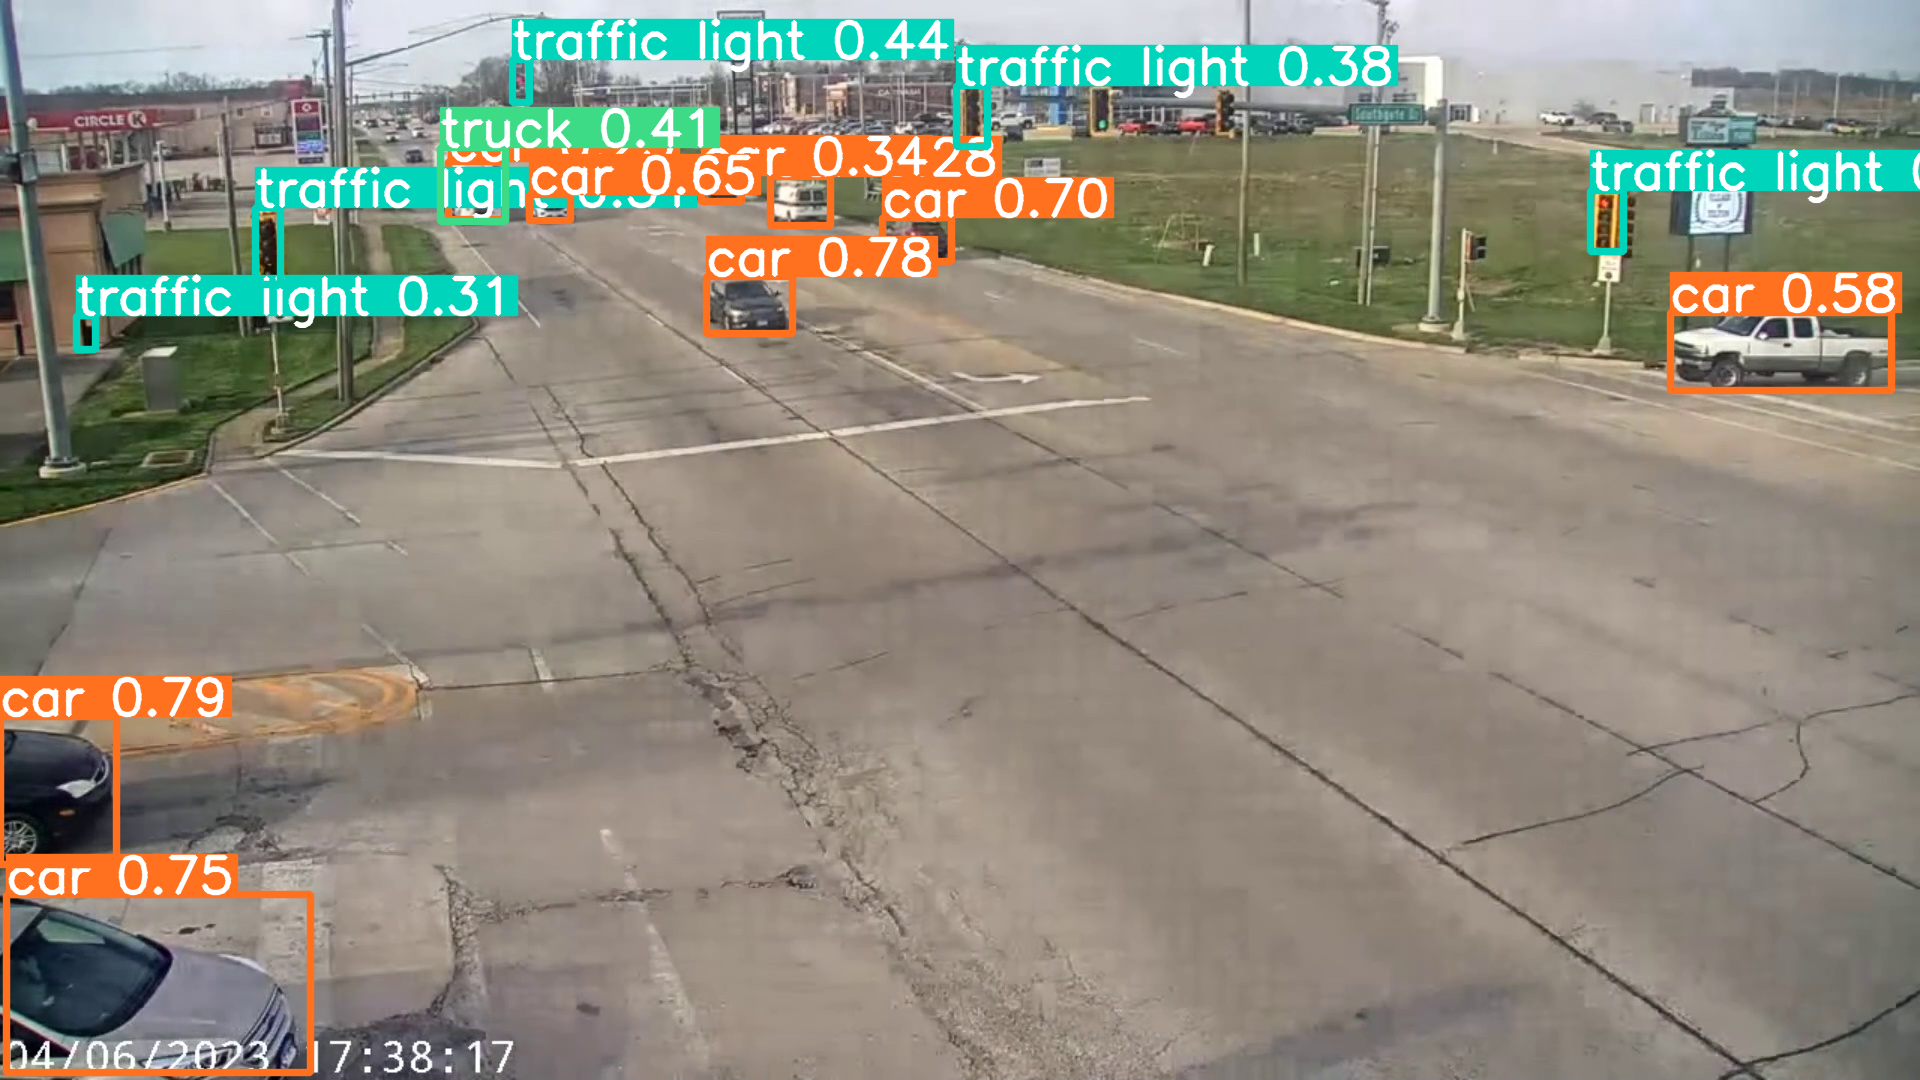

Number of vehicles detected: 8


In [ ]:
# Load the image
image_path = '/content/image_directory/1.jpg'
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Perform object detection
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)
results = model(img)
results.conf = 0.4  # Set the confidence threshold here

# Visualize the results
results_img = T.ToPILImage(mode='RGB')(results.render()[0])
display(results_img)

# Define vehicle classes in the COCO dataset
vehicle_classes = {2: "car", 5: "bus", 7: "truck", 18: "motorcycle"}

# Count vehicles in the results with a confidence level above 0.3
vehicle_count = 0
for *xyxy, conf, cls in results.xyxy[0]:
    if int(cls) in vehicle_classes and conf > 0.3:  # Check if the detected class is a vehicle and confidence is above 0.3
        vehicle_count += 1

print(f"Number of vehicles detected: {vehicle_count}")


###Counting vehicles of all images

In [ ]:
import os

image_directory = "/content/image_directory"

# Define vehicle classes in the COCO dataset
vehicle_classes = {2: "car", 5: "bus", 7: "truck", 18: "motorcycle"}

# Function to process an individual image
def process_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    results = model(img)
    results.conf = 0.4

    vehicle_count = 0
    for *xyxy, conf, cls in results.xyxy[0]:
        if int(cls) in vehicle_classes and conf > 0.3:
            vehicle_count += 1

    return vehicle_count

# Loop through all images in the directory
for file in os.listdir(image_directory):
    if file.endswith(".png") or file.endswith(".jpg") or file.endswith(".jpeg"):
        file_path = os.path.join(image_directory, file)
        vehicle_count = process_image(file_path)
        print(f"Number of vehicles detected in {file}: {vehicle_count}")


Number of vehicles detected in 3.jpg: 26
Number of vehicles detected in 6.jpg: 24
Number of vehicles detected in 4.jpg: 12
Number of vehicles detected in 1.jpg: 1


In [ ]:
import os
import cv2
import csv
from datetime import datetime

image_directory = "/content/image_directory"
output_csv = "/content/vehicle_counts.csv"

# Define vehicle classes in the COCO dataset
vehicle_classes = {2: "car", 5: "bus", 7: "truck", 18: "motorcycle"}

# Function to process an individual image
def process_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    results = model(img)
    results.conf = 0.4

    vehicle_count = 0
    for *xyxy, conf, cls in results.xyxy[0]:
        if int(cls) in vehicle_classes and conf > 0.3:
            vehicle_count += 1

    return vehicle_count

# Function to extract timestamp from file name
def extract_timestamp(file_name):
    try:
        timestamp_str = file_name.split('.')[0]  # Remove file extension
        timestamp = datetime.strptime(timestamp_str, "%Y-%m-%d_%H-%M-%S")
    except ValueError:
        timestamp = None
    return timestamp

# Write header for the CSV file
with open(output_csv, "w") as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(["File", "Timestamp", "Vehicle Count"])

# Loop through all images in the directory
for file in os.listdir(image_directory):
    if file.endswith(".png") or file.endswith(".jpg") or file.endswith(".jpeg"):
        file_path = os.path.join(image_directory, file)
        timestamp = extract_timestamp(file)
        vehicle_count = process_image(file_path)

        # Write results to CSV file
        with open(output_csv, "a") as csvfile:
            csvwriter = csv.writer(csvfile)
            csvwriter.writerow([file, timestamp, vehicle_count])

        print(f"Number of vehicles detected in {file}: {vehicle_count}")


Number of vehicles detected in 3.jpg: 26
Number of vehicles detected in 6.jpg: 24
Number of vehicles detected in 4.jpg: 12
Number of vehicles detected in 1.jpg: 1


##try this Collecting data

In [ ]:
import os
import cv2
import re
import csv
from datetime import datetime
import pytesseract
from pytesseract import Output

image_directory = "/content/image_directory"
output_csv = "/content/vehicle_counts.csv"

# Define vehicle classes in the COCO dataset
vehicle_classes = {2: "car", 5: "bus", 7: "truck", 18: "motorcycle"}

# Function to process an individual image
def process_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    results = model(img)
    results.conf = 0.4

    vehicle_count = 0
    for *xyxy, conf, cls in results.xyxy[0]:
        if int(cls) in vehicle_classes and conf > 0.3:
            vehicle_count += 1

    return vehicle_count

# Function to extract timestamp from the image using OCR
def extract_timestamp(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Adjust ROI to the specific location where the timestamp is displayed
    roi = img[0:100, 0:300]

    # Extract text from the ROI using Tesseract OCR
    text = pytesseract.image_to_string(roi, config="--psm 11")

    try:
        # Extract the timestamp from the text using regular expressions
        regex = r"\d{4}-\d{2}-\d{2}\s+\d{2}:\d{2}:\d{2}"
        timestamp_str = re.search(regex, text).group()
        timestamp = datetime.strptime(timestamp_str, "%Y-%m-%d %H:%M:%S")
    except (ValueError, AttributeError):
        timestamp = None

    return timestamp

# Write header for the CSV file
with open(output_csv, "w") as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(["Timestamp", "Vehicle Count"])

# Loop through all images in the directory
for file in os.listdir(image_directory):
    if file.endswith(".png") or file.endswith(".jpg") or file.endswith(".jpeg"):
        file_path = os.path.join(image_directory, file)
        timestamp = extract_timestamp(file_path)
        vehicle_count = process_image(file_path)

        # Write results to CSV file
        with open(output_csv, "a") as csvfile:
            csvwriter = csv.writer(csvfile)
            csvwriter.writerow([timestamp, vehicle_count])

        print(f"Number of vehicles detected in {file}: {vehicle_count}")
